# **Machine Learning Model: Recommend outfits based on User's determined Age Group.**

## **Part-1:  Predict the age group of the user depending upon his/her Age:**

- The age group can be determined depending upon the age of the user. The three age groups that the model supports are - Children, Teen, Adult.
- Depending upon the age range, the user's will be alotted to their specific age group for further outfit recommendations.

## **EDA - Exploratory data Analysis:**

In [ ]:
!pip install -U pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pandas_profiling-3.6.6-py2.py3-none-any.whl (324 kB)
  Using cached ydata_profiling-4.1.2-py2.py3-none-any.whl (345 kB)
  Using cached multimethod-1.9.1-py3-none-any.whl (10 kB)
  Using cached scipy-1.9.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (33.7 MB)
  Using cached visions-0.7.5-py3-none-any.whl (102 kB)
  Using cached matplotlib-3.6.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.8 MB)
  Using cached ImageHash-4.3.1-py2.py3-none-any.whl (296 kB)
  Using cached phik-0.12.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (679 kB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalle

In [ ]:
import json
import numpy as np
import pandas as pd
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
import pandas_profiling
from pandas_profiling import ProfileReport

<ipython-input-1-dcadcd0adfc6>:9: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link1 = 'https://drive.google.com/file/d/1dqHSQboky_MLn6xjdJ7ec9OyySmLvG7B/view?usp=share_link'
id1 = link1.split("/")[-2]

downloaded11 = drive.CreateFile({'id':id1})
downloaded11.GetContentFile('sample_outfits.csv') 
outfits_df = pd.read_csv('sample_outfits.csv', error_bad_lines=False)
outfits_df

<ipython-input-3-e2f731019f21>:6: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  outfits_df = pd.read_csv('sample_outfits.csv', error_bad_lines=False)
Skipping line 20: expected 25 fields, saw 26
Skipping line 106: expected 25 fields, saw 26
Skipping line 116: expected 25 fields, saw 26
Skipping line 119: expected 25 fields, saw 26
Skipping line 132: expected 25 fields, saw 26
Skipping line 139: expected 25 fields, saw 26
Skipping line 239: expected 25 fields, saw 26
Skipping line 284: expected 25 fields, saw 26
Skipping line 294: expected 25 fields, saw 26
Skipping line 332: expected 25 fields, saw 26
Skipping line 389: expected 25 fields, saw 26
Skipping line 434: expected 25 fields, saw 26
Skipping line 438: expected 25 fields, saw 26
Skipping line 439: expected 25 fields, saw 26
Skipping line 453: expected 25 fields, saw 26
Skipping line 491: expected 25 fields, saw 26
Skipping line 507: e

,uniq_id,crawl_timestamp,product_id,link,size,variant_sku,brand,care_instructions,dominant_material,title,...,product_details,size_fit,complete_the_look,type,variant_price,variant_compare_at_price,ideal_for,is_in_stock,inventory,specifications
0,cc51c3dd925d9d84e2fb28c7918dbbc3,2019-08-11 05:49:46 +0000,6937673,https://www.myntra.com/tops/imara/imara-women-...,XL,6937673_XL,IMARA,Polyester | Dry-clean,Polyester,IMARA Women Black Solid Top,...,"Black solid woven regular top,has a V-neck, th...","The model (height 5'8"") is wearing a size S",Improve your personal style with a brand new t...,Clothing/Women/Tops/IMARA/More by IMARA,959,1599,Women,Out of Stock,0,Transparency : Opaque | Sleeve Styling : Bell ...
1,c7e2fe388a93dae5c86b50dd8a5dbd7a,2019-07-03 01:04:34 +0000,7441182,https://www.myntra.com/kurtas/house-of-pataudi...,XL,7441182_XL,House of Pataudi,100% cottonMachine-wash,cotton,House of Pataudi Men Black Printed Straight Kurta,...,"Black printed straight kurta, has a mandarin c...",The model (height 6') is wearing a size M,"From House of Pataudi, this kurta is a great w...",Clothing/Men/Kurtas/House of Pataudi/More by H...,799,1999,Men,In Stock,Shape : Straight | Sleeve Styling : Regular Sl...,NaN
2,76949d78057a633aace6246045eefd66,2019-07-15 09:43:31 +0000,9245141,https://www.myntra.com/pillows/the-white-willo...,S,9245141_S,The White Willow,Polycotton | Only spot clean by hand with warm...,Cotton,The White Willow Unisex Off-White Therapedic M...,...,Set content: 1 pillow Colour: Off white Fill...,Dimensions: 58.42 cm x 33.02 cm x 10.16 cm,The White Willow has been founded with the vis...,Home/Unisex/Pillows/The White Willow/More by T...,1399,2799,Unisex,In Stock,Number of Components : 1 | Material : Polycott...,NaN
3,5f83f6b51da1ef93bc0585577b6991e6,2019-07-15 14:11:14 +0000,1314889,https://www.myntra.com/dupatta/dupatta-bazaar/...,Onesize,1314889_Onesize,Dupatta Bazaar,Chiffon | Hand-wash,Chiffon,Dupatta Bazaar Pink Dupatta,...,Pink dupatta&nbsp;with crinkled effect,Length: 2.3 metres Width: 1.1 metres,Complement your ethnic ensemble with this dupa...,Clothing/Women/Dupatta/Dupatta Bazaar/More by ...,349,499,Women,In Stock,Pattern : Solid | Occasion : Daily | Border : ...,NaN
4,890bf4355c319a4211296b9d3176d11f,2019-06-01 08:17:28 +0000,7705322,https://www.myntra.com/kurta-sets/manyavar/man...,S,7705322_S,Manyavar,Top fabric: Silk Blend | Bottom fabric: Silk B...,Silk,Manyavar Men Yellow & White Self Design Kurta ...,...,Yellow and white self design kurta with churid...,The model (height 6') is wearing a size M,"From Manyavar, this kurta is a great way to sh...",Clothing/Men/Kurta Sets/Manyavar/More by Manyavar,2999,2999,Men,Out of Stock,Occasion : Festive | Number of Components : 2 ...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14226,65cd8b64bac9149ae6376fc9f0291b85,2019-08-19 03:44:04 +0000,2366741,https://www.myntra.com/2366741,M,2366741_M,Shree,100% LivaHand-wash,Liva,Shree Women Grey & Red Floral Print Maxi Dress,...,Grey and red floral print woven maxi dress wit...,"Semi-Fit The model (height 5'8"") is wearing a...",This timeless and sumptuous Shree dress is sui...,Clothing/Women/Dresses/Shree/More by Shree,764,1699,Women,Out of Stock,0,Knit or Woven : Woven | Transparency : Opaque ...
14227,fa6d9090467edc3dc0706e6c66707bd1,2019-08-19 07:01:59 +0000,6554346,https://www.myntra.com/6554346,XL,6554346_XL,Freehand,Top fabric: Pure Cotton | Bottom fabric: Pure ...,Cotton,Freehand Men Red & White Self-Design Kurta wit...,...,Red and white self design kurta with pyjamas R...,The model (height 6') is wearing a size M,This in-style kurta from Freehand is a must-ha...,Clothing/Men/Kurta Sets/Freehand/More by Freehand,919,2299,Men,Out of Stock,0,Occasion : Daily | Number of Components : 2 | ...
14228,eb9b1ec5ba4418d764472288aab8ae82,2019-08-04 17:42:42 +0000,10300951,https://www.myntra.com/kurta-sets/lilpicks/lil...,2-3Y,10300951_2-3Y,LilPicks,Top fabric: Cotton Blend | Botto

In [ ]:
profile = ProfileReport(outfits_df, title="Sample Outfits Profiling Report")

In [ ]:
profile.to_file("outfits-profiling-report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### **Using SweetViz:**

In [ ]:
#SweetViz

!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 56.0 MB/s eta 0:00:00


In [ ]:
import sweetviz as sv

In [ ]:
my_report = sv.analyze(outfits_df)
my_report.show_html()

/usr/local/lib/python3.10/dist-packages/sweetviz/dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
/usr/local/lib/python3.10/dist-packages/sweetviz/dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |          | [  0%]   00:00 -> (? left)

/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### **Data Visualizations:**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 

<ipython-input-16-de9639d870cf>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(outfits_df.corr(), annot = True, cmap = 'coolwarm');


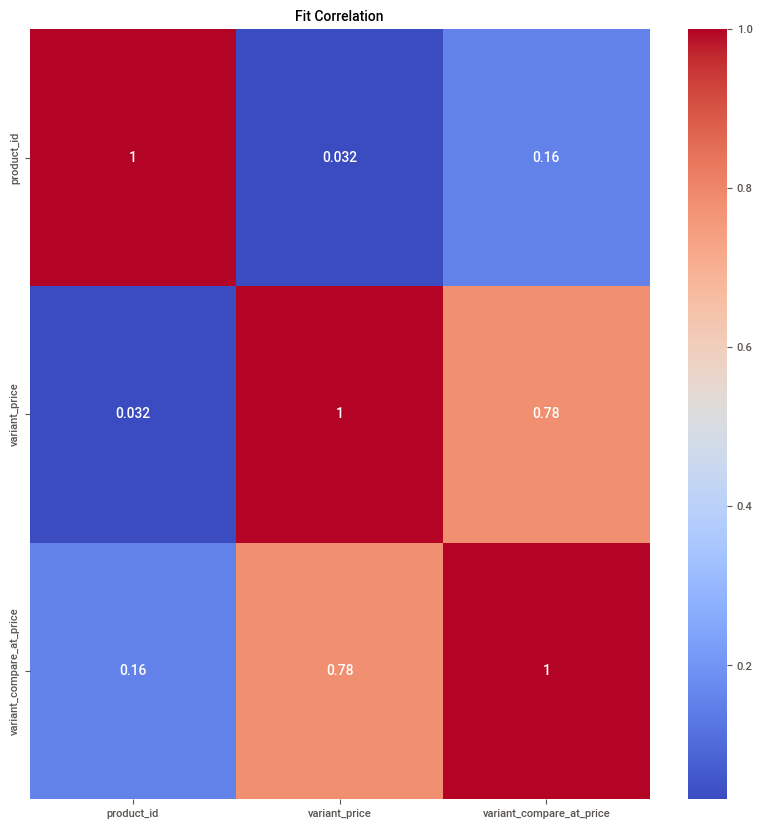

In [ ]:
plt.figure(figsize= (10,10))
sns.heatmap(outfits_df.corr(), annot = True, cmap = 'coolwarm');
plt.title("Fit Correlation", size =10);

<ipython-input-19-58db4f945299>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(outfits_df['variant_price']);


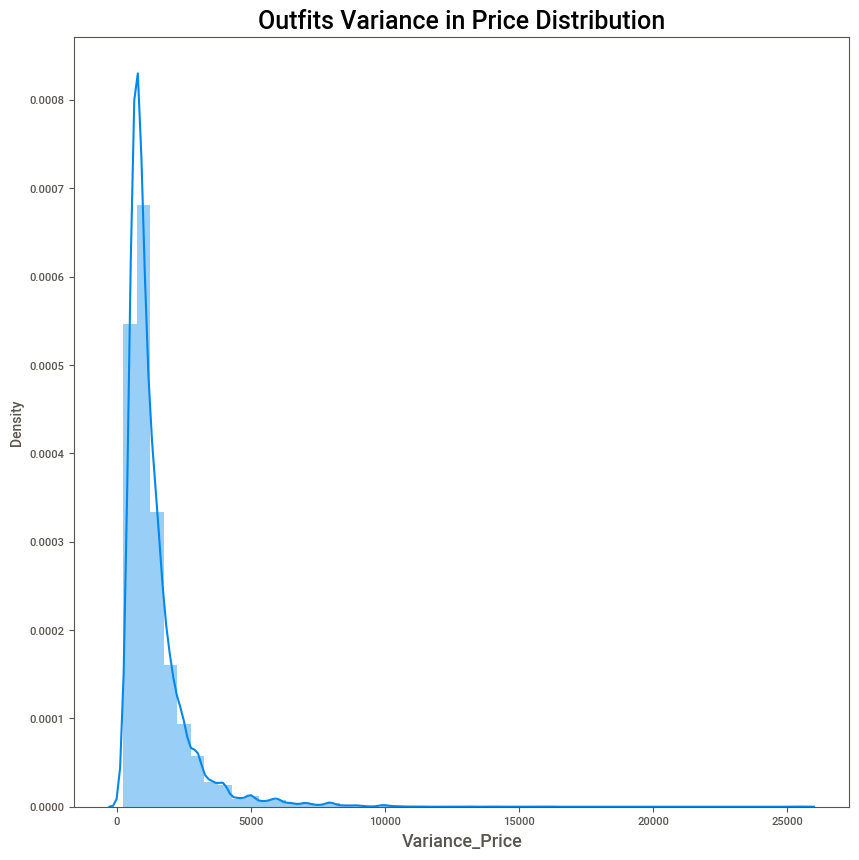

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.distplot(outfits_df['variant_price']);
ax.set_title('Outfits Variance in Price Distribution', size = 18)
ax.set_xlabel('Variance_Price', size = 13);

<ipython-input-24-36f3e7543a84>:2: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  results.set_ylim(10, 10)


(9.5, 10.5)

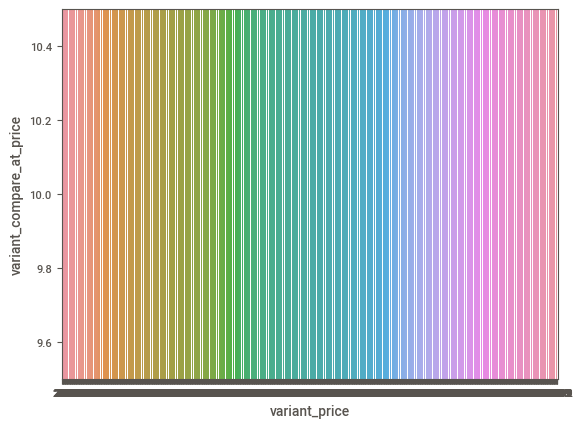

In [ ]:
results = sns.barplot(x='variant_price', y='variant_compare_at_price', data= outfits_df);
results.set_ylim(10, 10)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)


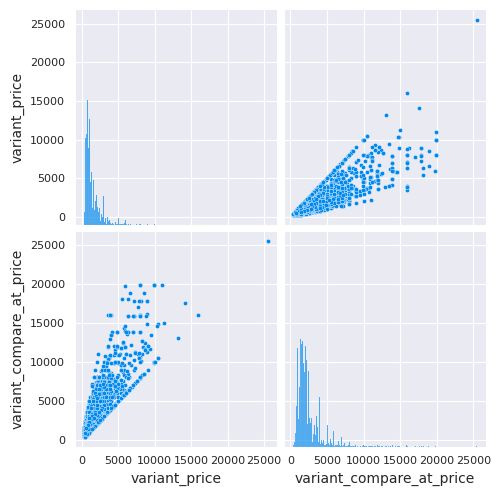

In [ ]:
sns.set_style("darkgrid")

pairs_plot_df = outfits_df.drop(["product_id", "actual_color", "title", "product_type", "product_details"], axis=1)
sns.pairplot(pairs_plot_df, palette="Set2")

Text(0.5, 1.0, 'Items rating distribution: 25% quantile at 4')

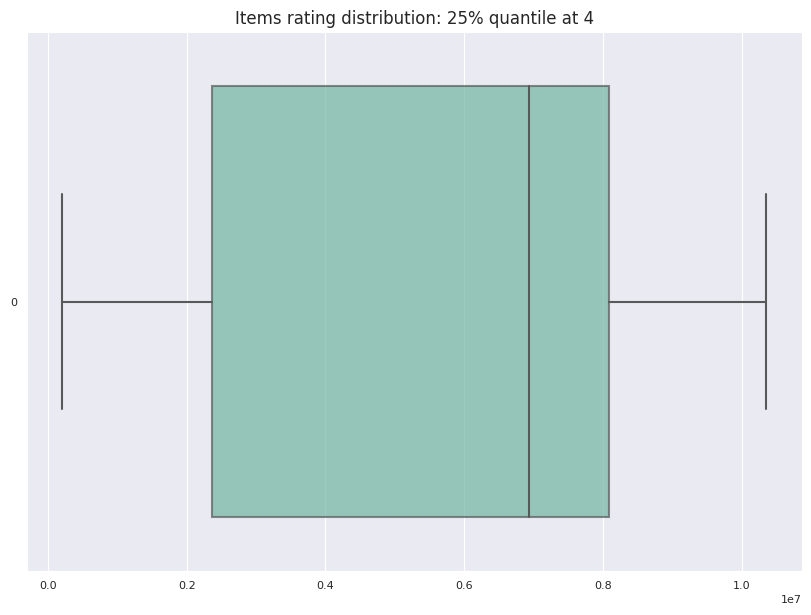

In [ ]:
plt.figure(figsize=(10, 7))
sns.boxplot(outfits_df["product_id"], orient="h", palette="Set2", boxprops=dict(alpha=.7))
plt.title("Items rating distribution: 25% quantile at 4")

In [ ]:
pd.DataFrame(outfits_df.groupby("product_id")["variant_price"].value_counts(normalize=True))

,,variant_price
product_id,variant_price,
203171,449,1.0
277316,1319,1.0
277318,1049,1.0
311432,1749,1.0
311433,1749,1.0
...,...,...
10352175,2639,1.0
10352185,2399,1.0
10352943,3299,1.0


In [ ]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [ ]:
@interact
def show_articles_more_than(column=['product_id', 'variant_price', 'variant_compare_at_price'], 
                            x=(0, 100)):
    return outfits_df.loc[outfits_df[column] > x]

interactive(children=(Dropdown(description='column', options=('product_id', 'variant_price', 'variant_compare_…

### **Import necessary libraries:**

In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
path1 = 'https://drive.google.com/uc?id=1uTdERhfpCC0dtc-YyXadY9ZoHShJvsDU'
num = pd.read_csv(path1)
df = num.loc[:, ['Age']]
df.columns = ['Age']
df.dropna(inplace=True)

**-- Define conditions to determine the age group for user:**

In [ ]:
def age_groups(df):
    # Add a new column called 'AgeGroups'
    df['AgeGroups'] = ''

    # Loop through each row in the dataframe
    for i in range(len(df)):
        # Determine age groups type as - Children, Teen, Adult
        age = df.at[i, 'Age']

        if age >= 1 and age <= 12:
            df.at[i, 'AgeGroups'] = 'Children'
        elif age >= 13 and age <= 17:
            df.at[i, 'AgeGroups'] = 'Teen'
        elif age >= 18 and age < 40:
            df.at[i, 'AgeGroups'] = 'Adult'

    return df

In [ ]:
df = age_groups(df)
df

,Age,AgeGroups
0,30,Adult
1,28,Adult
2,27,Adult
3,29,Adult
4,28,Adult
...,...,...
711,13,Teen
712,10,Children
713,4,Children
714,13,Teen


In [ ]:
value_counts = df['AgeGroups'].value_counts()

print(value_counts)

Children    396
Adult       209
Teen         78
             33
Name: AgeGroups, dtype: int64


### **Check if the count for every age group is valid:**

In [ ]:
count_rect = len(df[df['AgeGroups'] == 'Children'])
print(count_rect)

396


In [ ]:
count_rect = len(df[df['AgeGroups'] == 'Teen'])
print(count_rect)

78


In [ ]:
count_rect = len(df[df['AgeGroups'] == 'Adult'])
print(count_rect)

209


### **Training, Validation and Test Data split:**

**-- Importing necessary libraries:**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score



#### **Identifying the input columns and the target column:**

In [ ]:
input_columns = ['product_id', 'variant_price', 'variant_compare_at_price', 'ideal_for', 'type', 'brand', 'actual_color', 'title', 'size_fit', 'specifications']

target = 'product_type'

#### **determine categorical and numerical columns:**

In [ ]:
numeric_cols = ['product_id', 'variant_price', 'variant_compare_at_price']
                 
categorical_cols = ['product_type']

In [ ]:
outfits_df['product_type'].value_counts()

Straight Kurta                                 3549
A-Line Kurta                                   1500
Kurta with Churidar                             703
Kurta with Pyjamas                              698
Maxi Dress                                      399
                                               ... 
Top with Skirt & Dupatta                          1
Kaftan Kurti with Pants                           1
Kurta with Ethnic Jacket Churidar & Dupatta       1
Shirt-Style Kurta                                 1
Flared Hem Design Palazzos                        1
Name: product_type, Length: 259, dtype: int64

#### **Inputing missing values:**

In [ ]:
outfits_df[input_columns].isna().sum()

product_id                     0
variant_price                  0
variant_compare_at_price       0
ideal_for                      0
type                           0
brand                          0
actual_color                 979
title                          0
size_fit                    1304
specifications              5379
dtype: int64

In [ ]:
outfits_df.dropna(inplace=True)

In [ ]:
outfits_df[input_columns].isna().sum()

product_id                  0
variant_price               0
variant_compare_at_price    0
ideal_for                   0
type                        0
brand                       0
actual_color                0
title                       0
size_fit                    0
specifications              0
dtype: int64

In [ ]:
outfits_df.shape

(6895, 25)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_val_df, test_df = train_test_split(outfits_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.2, random_state=42)
print('train_df', train_df.shape)
print('val_df', val_df.shape)
print('test_df', test_df.shape)

train_df (4412, 25)
val_df (1104, 25)
test_df (1379, 25)


In [ ]:
train_inputs = train_df[input_columns].copy()
val_inputs = val_df[input_columns].copy()
test_inputs = test_df[input_columns].copy()

In [ ]:
Y_train = train_df[target].copy()
Y_val = val_df[target].copy()
Y_test = test_df[target].copy()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler().fit(outfits_df[numeric_cols])

In [ ]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

#### **Encoding Categorical Columns:**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(outfits_df[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### **Split the dataset into train and test sets:**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[['Age']], df['AgeGroups'], test_size=0.2, random_state=42)


### **Create a DecisonTree Classifier and fit it to the training datasets:**

In [ ]:
clf_age_based = DecisionTreeClassifier()
clf_age_based.fit(X_train, y_train)

DecisionTreeClassifier()

**-- Predict the age group based on test datasets:**

In [ ]:
y_pred = clf_age_based.predict(X_test)

-- Accuracy rate of the DecisionTree Classifier:

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 1.0


### **Sample testing on trained datasets:**

In [ ]:
# predict the age group of user

input_values = np.array([[4]])

predicted_age_group = clf_age_based.predict(input_values)

print('Predicted age group:', predicted_age_group)

Predicted age group: ['Children']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# predict the age group of user

input_values = np.array([[14]])

predicted_age_group = clf_age_based.predict(input_values)

print('Predicted age group:', predicted_age_group)

Predicted age group: ['Teen']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# predict the age group of user

input_values = np.array([[32]])

predicted_age_group = clf_age_based.predict(input_values)

print('Predicted age group:', predicted_age_group)

Predicted age group: ['Adult']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## **Part-2:  Recommend outfits to user based on the predicted age group.**

**General notion of outfits specific to age groups are:**


**-- Children:**    *t-shirt, jeans, shorts, casuals, smock dresses, skirts*

**-- Teen:**    *v-neck tshirts, graphic tees, skinny jeans, sneakers, mini dresses, short skirts, rompers*

**-- Adult:**    *slacks, heels, skirts, wrap dresses, chic, jumpsuits, midi dresses, sandals, bodycon*




**List of DressTypes appropriate for determined AgeGroup:**

*-- 'Ruffle dress', 'Tunics', 'V-neck tops', 'Rompers', 'Pencil cut skirts', 'Tank tops', tailored blazers', 'high-waisted pants', 'bootcut jeans', 'peplum tops'*

*-- 'Wrap dresses', 'fit and flare dresses', 'Bodycon dresses', 'Shift dresses', 'A-line dresses', 'Midi dresses', 'Pencil skirts', 'Crop tops', 'high-waisted jeans', 'flared pants', 'wrap dresses', 'fit and flare dresses'*

**The keywords to be matched for the specific AgeGroup:**

**-- Children:**   *t-shirt, jeans, shorts, smock dress, ruffle dress, tunics, skirts, jumpers*

**-- Teen:**   *skinny jeans, graphic tees, V-neck, sneakers, dresses, Off-shoulder*

**-- Adult:**   *chic, Off-shoulder, Bodycon, pencil skirt, blazers, blouses, jumpsuits, tops, sandals, mini skirts*


### **Import the sample dataset for outfit recommendation:**

In [ ]:
import pandas as pd

age_groups_dict = {
    "Children": ["t-shirt", "jeans", "shorts", "smock dress", "boys", "girls", "child"],
    "Teens": ["skinny jeans", "graphic tees", "V-neck", "sneakers", "dresses", "Off-shoulder"],
    "Adult": ["chic", "Off-shoulder", "Bodycon", "pencil skirt", "blazers", "blouses", "jumpsuits", "tops", "sandals", "mini skirts"]
}


def map_ageGroup_to_dressType(agegrp):
    for key, value in age_groups_dict.items():
        if agegrp == key:
            return value
    return "Unknown"


df["Dresstype"] = df["AgeGroups"].apply(map_ageGroup_to_dressType)

print(df)
df.head()

     Age AgeGroups                                          Dresstype
0     30     Adult  [chic, Off-shoulder, Bodycon, pencil skirt, bl...
1     28     Adult  [chic, Off-shoulder, Bodycon, pencil skirt, bl...
2     27     Adult  [chic, Off-shoulder, Bodycon, pencil skirt, bl...
3     29     Adult  [chic, Off-shoulder, Bodycon, pencil skirt, bl...
4     28     Adult  [chic, Off-shoulder, Bodycon, pencil skirt, bl...
..   ...       ...                                                ...
711   13      Teen                                            Unknown
712   10  Children  [t-shirt, jeans, shorts, smock dress, boys, gi...
713    4  Children  [t-shirt, jeans, shorts, smock dress, boys, gi...
714   13      Teen                                            Unknown
715    4  Children  [t-shirt, jeans, shorts, smock dress, boys, gi...

[716 rows x 3 columns]


,Age,AgeGroups,Dresstype
0,30,Adult,"[chic, Off-shoulder, Bodycon, pencil skirt, bl..."
1,28,Adult,"[chic, Off-shoulder, Bodycon, pencil skirt, bl..."
2,27,Adult,"[chic, Off-shoulder, Bodycon, pencil skirt, bl..."
3,29,Adult,"[chic, Off-shoulder, Bodycon, pencil skirt, bl..."
4,28,Adult,"[chic, Off-shoulder, Bodycon, pencil skirt, bl..."


In [ ]:
path2 = 'https://drive.google.com/uc?id=1ypzPWMt5FqtUYtS0kN_OpXjtYKXZxno9'
num = pd.read_csv(path2, on_bad_lines='skip')
df1 = num.loc[:, ['title', 'product_type', 'product_details', 'ideal_for', 'type', 'images', 'link', 'brand', 'actual_color', 'specifications']]

df1.dropna(inplace=True)
df1.head()

,title,product_type,product_details,ideal_for,type,images,link,brand,actual_color,specifications
0,IMARA Women Black Solid Top,Top,"Black solid woven regular top,has a V-neck, th...",Women,Clothing/Women/Tops/IMARA/More by IMARA,http://assets.myntassets.com/v1/assets/images/...,https://www.myntra.com/tops/imara/imara-women-...,IMARA,Black,Transparency : Opaque | Sleeve Styling : Bell ...
5,Wintage Men Beige Solid Kurta with Pyjamas,Kurta with Pyjamas,Beige solid kurta with pyjamas Beige straight ...,Men,Clothing/Men/Kurta Sets/Wintage/More by Wintage,http://assets.myntassets.com/v1/assets/images/...,https://www.myntra.com/kurta-sets/wintage/wint...,Wintage,Beige,Sleeve Styling : Regular Sleeves | Occasion : ...
9,SALWAR STUDIO Boys Orange & White Printed Kurt...,Kurta with Pyjamas,Orange and white printed kurta with pyjamas Or...,Boys,Clothing/Boys/Kurta Sets/SALWAR STUDIO/More by...,http://assets.myntassets.com/v1/assets/images/...,https://www.myntra.com/kurta-sets/salwar-studi...,SALWAR STUDIO,White | Orange,Occasion : Festive | Number of Components : 2 ...
10,Clora Creation Women Navy Blue Wide Leg Printe...,Printed Palazzos,A pair of navy blue printed woven wide leg pal...,Women,Clothing/Women/Palazzos/Clora Creation/More by...,http://assets.myntassets.com/v1/assets/images/...,https://www.myntra.com/palazzos/clora-creation...,Clora Creation,Blue | Navy,Transparency : Opaque | Closure : Slip-On | Oc...
11,Libas Women Blue & White Striped Straight Kurta,Straight Kurta,"Blue and white striped straight kurta, has a s...",Women,Clothing/Women/Kurtas/Libas/More by Libas,http://assets.myntassets.com/v1/assets/images/...,https://www.myntra.com/kurtas/libas/libas-wome...,Libas,Blue | White,Shape : Straight | Sleeve Styling : Regular Sl...


In [ ]:
num_rows = df1.shape[0]
print('Number of rows:', num_rows)

Number of rows: 7684


### **RegEx Pattern Matching functionality:**

In [ ]:
import re

keywords = ['t-shirt', 'jeans', 'shorts', 'smock dress', 'skinny jeans', 'graphic tees', 'V-neck', 'sneakers', 'dresses', 'Off-shoulder',
            'chic', 'Off-shoulder', 'Bodycon', 'pencil skirt', 'blazers', 'blouse', 'jumpsuits', 'sandals', 'mini skirts', 'tops',
            'classy', 'sophisticated', 'peplum', 'trousers', 'shirt dress', 'formal', 'boys', 'girls', 'child', 'kurta', 'dupatta']

#Check for extra spaces and convert to lower case
keywords = [kw.strip().lower() for kw in keywords]

# Join the keywords with "|" operator for matching the pattern
pattern = '|'.join(keywords)

# Use str.contains() for regular expression patterns
filtered_df = df1[df1['product_type'].str.contains(pattern, flags=re.IGNORECASE) | 
                 df1['product_details'].str.contains(pattern, flags=re.IGNORECASE) | 
                 df1['title'].str.contains(pattern, flags=re.IGNORECASE) | 
                 df1['ideal_for'].str.contains(pattern, flags=re.IGNORECASE) | 
                 df1['images'].str.contains(pattern, flags=re.IGNORECASE) |
                 df1['type'].str.contains(pattern, flags=re.IGNORECASE)]
filtered_df.head()

,title,product_type,product_details,ideal_for,type,images,link,brand,actual_color,specifications
0,IMARA Women Black Solid Top,Top,"Black solid woven regular top,has a V-neck, th...",Women,Clothing/Women/Tops/IMARA/More by IMARA,http://assets.myntassets.com/v1/assets/images/...,https://www.myntra.com/tops/imara/imara-women-...,IMARA,Black,Transparency : Opaque | Sleeve Styling : Bell ...
5,Wintage Men Beige Solid Kurta with Pyjamas,Kurta with Pyjamas,Beige solid kurta with pyjamas Beige straight ...,Men,Clothing/Men/Kurta Sets/Wintage/More by Wintage,http://assets.myntassets.com/v1/assets/images/...,https://www.myntra.com/kurta-sets/wintage/wint...,Wintage,Beige,Sleeve Styling : Regular Sleeves | Occasion : ...
9,SALWAR STUDIO Boys Orange & White Printed Kurt...,Kurta with Pyjamas,Orange and white printed kurta with pyjamas Or...,Boys,Clothing/Boys/Kurta Sets/SALWAR STUDIO/More by...,http://assets.myntassets.com/v1/assets/images/...,https://www.myntra.com/kurta-sets/salwar-studi...,SALWAR STUDIO,White | Orange,Occasion : Festive | Number of Components : 2 ...
11,Libas Women Blue & White Striped Straight Kurta,Straight Kurta,"Blue and white striped straight kurta, has a s...",Women,Clothing/Women/Kurtas/Libas/More by Libas,http://assets.myntassets.com/v1/assets/images/...,https://www.myntra.com/kurtas/libas/libas-wome...,Libas,Blue | White,Shape : Straight | Sleeve Styling : Regular Sl...
12,Libas Women Coffee Brown Solid Kurta with Pala...,Kurta with Palazzos,Coffee brown solid kurta with palazzos Coffee ...,Women,Clothing/Women/Kurta Sets/Libas/More by Libas,http://assets.myntassets.com/v1/assets/images/...,https://www.myntra.com/kurta-sets/libas/libas-...,Libas,Brown | Coffee Brown,Occasion : Daily | Number of Components : 2 | ...


In [ ]:
num_rows = filtered_df.shape[0]
print('Number of rows in filtered dataframe:', num_rows)

Number of rows in filtered dataframe: 6929


In [ ]:
filtered_df.shape[0]

6929

In [ ]:
keywords = ['child']

#Check for extra spaces and convert to lower case
keywords = [kw.strip().lower() for kw in keywords]

# Join the keywords with "|" operator for matching the pattern
pattern = '|'.join(keywords)

# Use str.contains() for regular expression patterns
filtered_df = df1[df1['product_type'].str.contains(pattern, flags=re.IGNORECASE) | 
                 df1['product_details'].str.contains(pattern, flags=re.IGNORECASE) | 
                 df1['type'].str.contains(pattern, flags=re.IGNORECASE)]

filtered_df.shape[0]

14

### **Matched patterns transferred to resultant dataframe:**

In [ ]:
import pandas as pd

age_groups_dict = {
    "Children": "t-shirt, jeans, shorts, smock dress, child, boys, girls",
    "Teens": "skinny jeans, graphic tees, V-neck, sneakers, dresses, Off-shoulder",
    "Adult": "chic, Off-shoulder, Bodycon, pencil skirt, blazers, blouses, jumpsuits, tops, sandals, mini skirts"
}


dfmap = pd.DataFrame.from_dict(age_groups_dict, orient='index')
dfmap = dfmap.reset_index()
dfmap.columns = ['AgeGroups', 'Dresstypes']
print(dfmap)

  AgeGroups                                         Dresstypes
0  Children  t-shirt, jeans, shorts, smock dress, child, bo...
1     Teens  skinny jeans, graphic tees, V-neck, sneakers, ...
2     Adult  chic, Off-shoulder, Bodycon, pencil skirt, bla...


### **Function to recommend outfits based on predicted age group:**

In [ ]:
def recommend_age_based_outfits(input_values):
  predicted_age_group = clf_age_based.predict(input_values)
  dress_types = dfmap.loc[dfmap['AgeGroups'] == predicted_age_group[0], 'Dresstypes'].iloc[0]
  keywords = dress_types.split(',')

  #Check for extra spaces and convert to lower case
  keywords = [kw.strip().lower() for kw in keywords]

  # Join the keywords with "|" operator for matching the pattern
  pattern = '|'.join(keywords)

  # Use str.contains() for regular expression patterns
  filtered_df = df1[df1['product_type'].str.contains(pattern, flags=re.IGNORECASE) | 
                  df1['product_details'].str.contains(pattern, flags=re.IGNORECASE) | 
                  df1['type'].str.contains(pattern, flags=re.IGNORECASE)]
                  
  filtered_df = filtered_df.assign(age_group=predicted_age_group[0])
  return filtered_df

In [ ]:
num_rows = filtered_df.shape[0]
print('Number of rows in filtered dataframe:', num_rows)

Number of rows in filtered dataframe: 14


In [ ]:
filtered_df.shape[0]

14

In [ ]:
result = recommend_age_based_outfits([[4]])
result

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


,title,product_type,product_details,ideal_for,type,images,link,brand,actual_color,specifications,age_group
9,SALWAR STUDIO Boys Orange & White Printed Kurt...,Kurta with Pyjamas,Orange and white printed kurta with pyjamas Or...,Boys,Clothing/Boys/Kurta Sets/SALWAR STUDIO/More by...,http://assets.myntassets.com/v1/assets/images/...,https://www.myntra.com/kurta-sets/salwar-studi...,SALWAR STUDIO,White | Orange,Occasion : Festive | Number of Components : 2 ...,Children
16,612 league Boys Red & Beige Solid Kurta with C...,Kurta with Churidar,Red and beige solid kurta with churidar Red a...,Boys,Clothing/Boys/Kurta Sets/612 league/More by 61...,http://assets.myntassets.com/v1/assets/images/...,https://www.myntra.com/8991019,612 league,Beige | Red,Occasion : Festive | Number of Components : 3 ...,Children
18,SOJANYA Boys Blue & Black Solid Kurta with Har...,Solid Kurta,Blue and black solid kurta with harem pants Bl...,Boys,Clothing/Boys/Kurta Sets/SOJANYA/More by SOJANYA,http://assets.myntassets.com/v1/assets/images/...,https://www.myntra.com/kurta-sets/sojanya/soja...,SOJANYA,Black | Blue,Occasion : Festive | Number of Components : 3 ...,Children
36,SG YUVRAJ Boys Maroon & Navy Blue Solid Kurta ...,Kurta with Trousers,Maroon and navy blue solid kurta with trousers...,Boys,Clothing/Boys/Kurta Sets/SG YUVRAJ/More by SG ...,http://assets.myntassets.com/v1/assets/images/...,https://www.myntra.com/kurta-sets/sg-yuvraj/sg...,SG YUVRAJ,Maroon | Blue | Navy,Occasion : Festive | Number of Components : 3 ...,Children
67,AJ Dezines Kids Beige & Pink Kurta Pyjama Wais...,Kurta Pyjama,AJ Dezines present this pink colored latest si...,Boys,Clothing/Boys/Kurta Sets/Aj DEZInES/More by Aj...,http://assets.myntassets.com/v1/assets/images/...,https://www.myntra.com/kurta-sets/aj-dezines/a...,Aj DEZInES,Beige | Pink,Occasion : Festive | Number of Components : 3 ...,Children
...,...,...,...,...,...,...,...,...,...,...,...
14143,Yellow Kite Girls Blue & Coral Pink Lehenga Ch...,Lehenga Choli with Dupatta,"Blue, gold-toned and coral pink lehenga choli ...",Girls,Clothing/Girls/Lehenga Choli/YK/More by YK,http://assets.myntassets.com/v1/assets/images/...,https://www.myntra.com/2063600,YK,Yellow | Pink | Blue | Coral,Dupatta Fabric : Net | Body or Garment Size : ...,Children
14144,SG YUVRAJ Boys Golden-Coloured & Red Self Desi...,Kurta with Trousers,Golden-coloured and red self design kurta with...,Boys,Clothing/Boys/Kurta Sets/SG YUVRAJ/More by SG ...,http://assets.myntassets.com/v1/assets/images/...,https://www.myntra.com/kurta-sets/sg-yuvraj/sg...,SG YUVRAJ,Red,Occasion : Festive | Number of Components : 3 ...,Children
14178,K&U Girls Green & Blue Printed Straight Kurta,Straight Kurta,"Green and blue printed straight kurta, has a r...",Girls,Clothing/Girls/Kurtas/K&U/More by K&U,http://assets.myntassets.com/v1/assets/images/...,https://www.myntra.com/7761537,K&U,Blue | Green,Shape : Straight | Sleeve Styling : No Sleeves...,Children
14210,BownBee Boys Pink & Yellow Printed Kurta with ...,Kurta with Dhoti Pants,Pink and yellow printed kurta with dhoti pants...,Boys,Clothing/Boys/Kurta Sets/BownBee/More by BownBee,http://assets.myntassets.com/v1/assets/images/...,https://www.myntra.com/8034229,BownBee,Yellow | Pink,Occasion : Festive | Number of Components : 2 ...,Children
